In [1]:
# parse and visualize the logfile
import os
import numpy as np

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Figures and Colors
%config InlineBackend.figure_formats = ['svg']
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 10
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (4,3)
cmap = plt.get_cmap("viridis")
colors = sns.color_palette("colorblind")
palette = sns.color_palette("Set2")
colors_b = sns.color_palette("Purples")
colors_g = sns.color_palette("Greens")
colors_r = sns.color_palette("Reds")
blues = plt.get_cmap("Blues")(np.linspace(0, 1, 9))


In [2]:
# colors

In [3]:
VARIATIONS = {
    'only_moe': 'moe',
    'noisy_top_k': 'moe_noisy_top_k',
    'aux_loss': 'moe_noisy_top_k_aux_loss',
    'z_loss': 'moe_noisy_top_k_aux_loss_router_z_loss',
    'router_full_prec': 'moe_noisy_top_k_aux_loss_router_z_loss_router_full_prec',
    'switch_tfm_init': 'moe_noisy_top_k_aux_loss_router_z_loss_router_full_prec_switch_tfm_init',
}

EXPERT_VARIATIONS = {
    'no_moe': 'no_moe',
    # 2 of 8 experts
    'only_moe': 'moe',
    'noisy_top_k': 'moe_noisy_top_k',
    # 1 of 8 experts
    'only_moe_topk_1': 'moe_top_k_1',
    'only_moe_topk_1_noisy_top_k': 'moe_top_k_1_noisy_top_k',
}

In [4]:

# Alternative flat structure for easier access
SEED_LOGS_FLAT = {
    
    # these are non-MoE models
    'no_moe_seed_42': 'log_no_moe_20250629_seed_42.txt',
    'no_moe_seed_2025': 'log_no_moe_20250629_seed_2025.txt',
    
    
    # these are 2 of 8 experts
    'only_moe_seed_42': 'log_moe_20250626_seed_42.txt',
    'only_moe_seed_2025': 'log_moe_20250629_seed_2025.txt',
    'only_moe_seed_1337': 'log_moe_20250711_seed_1337.txt',
    
    'noisy_top_k_seed_42': 'log_moe_noisy_top_k_20250626_seed_42.txt',
    'noisy_top_k_seed_2025': 'log_moe_noisy_top_k_20250629_seed_2025.txt',
    'noisy_top_k_seed_1337': 'log_moe_noisy_top_k_20250711_seed_1337.txt',
    
    'aux_loss_seed_42': 'log_moe_noisy_top_k_aux_loss_20250626_seed_42.txt',
    'aux_loss_seed_2025': 'log_moe_noisy_top_k_aux_loss_20250629_seed_2025.txt',
    'aux_loss_seed_1337': 'log_moe_noisy_top_k_aux_loss_20250711_seed_1337.txt',
    
    'z_loss_seed_42': 'log_moe_noisy_top_k_aux_loss_router_z_loss_20250626_seed_42.txt',
    'z_loss_seed_2025': 'log_moe_noisy_top_k_aux_loss_router_z_loss_20250629_seed_2025.txt',
    'z_loss_seed_1337': 'log_moe_noisy_top_k_aux_loss_router_z_loss_20250711_seed_1337.txt',
    
    'router_full_prec_seed_42': 'log_moe_noisy_top_k_aux_loss_router_z_loss_router_full_prec_20250626_seed_42.txt',
    'router_full_prec_seed_2025': 'log_moe_noisy_top_k_aux_loss_router_z_loss_router_full_prec_20250629_seed_2025.txt',
    'router_full_prec_seed_1337': 'log_moe_noisy_top_k_aux_loss_router_z_loss_router_full_prec_20250711_seed_1338.txt',

    'switch_tfm_init_seed_42': 'log_moe_noisy_top_k_aux_loss_router_z_loss_switch_tfm_init_router_full_prec_20250626_seed_42.txt',
    'switch_tfm_init_seed_2025': 'log_moe_noisy_top_k_aux_loss_router_z_loss_switch_tfm_init_router_full_prec_20250629_seed_2025.txt',
    'switch_tfm_init_seed_1337': 'log_moe_noisy_top_k_aux_loss_router_z_loss_switch_tfm_init_router_full_prec_20250711_seed_1337.txt',
    
    
    # these are 1 of 8 experts
    'only_moe_topk_1_seed_42': 'log_moe_top_k_1_20250629_seed_42.txt',
    'only_moe_topk_1_noisy_top_k_seed_42': 'log_moe_top_k_1_noisy_top_k_20250629_seed_42.txt',
    
}

In [5]:
# !ls ../logs/

In [22]:
def get_log_by_config(name, seed=42):
    key = f'{name}_seed_{seed}'
    # print(key)
    return SEED_LOGS_FLAT.get(key, None)

def process_one_log_file(path_to_log_file: str):
    if not os.path.exists(path_to_log_file):
        print(f"Could not find file: {path_to_log_file}")
        return None

    # print(f"processing file: {path_to_log_file} ...")
    with open(path_to_log_file, "r") as f:
        lines = f.readlines()

    # parse the individual lines, group by stream (train,val,hella)
    streams = {}
    for line in lines:
        step, stream, val = line.strip().split()
        if int(step) > 26000:
            break
        if stream not in streams:
            streams[stream] = {}
        streams[stream][int(step)] = float(val)

    # convert each stream from {step: val} to (steps[], vals[])
    # so it's easier for plotting
    streams_xy = {}
    for k, v in streams.items():
        # get all (step, val) items, sort them
        xy = sorted(list(v.items()))
        # unpack the list of tuples to tuple of lists
        streams_xy[k] = list(zip(*xy))

    return streams_xy

def create_label(name):
    if name in ['only_moe', 'no_moe']:
        return name
    else:
        return f"+{name}"

def plot_one_stream(name,
                    key: str='val',
                    ax=None,
                    seeds=[42, 1337, 2025],
                    label=None,
                    color=None,
                    legend=True, title=False, ylim_top=4.0, label_all=False, show_variance=True, show_baseline=False):
    import matplotlib.ticker as ticker
    from matplotlib.ticker import ScalarFormatter
    assert key in {'train', 'val', 'hella'}

    # Get data for all 3 seeds
    # seeds = [42, 1337, 2025]
    all_metrics = []
    valid_seeds = []
    
    for seed in seeds:
        log_file_path = get_log_by_config(name, seed)
        
        if log_file_path is None:
            # print(f"No log file found for seed {seed}, skipping {name}...")
            continue
            
        metrics = process_one_log_file(f"../logs/{log_file_path}")
        if metrics is not None and key in metrics:
            all_metrics.append(metrics[key])
            valid_seeds.append(seed)
        else:
            print(f"Failed to process or missing key '{key}' for seed {seed}, skipping...")
    
    if len(all_metrics) == 0:
        print(f"No valid data found for any seed, skipping...")
        return None
    
    # print(f"Successfully loaded data for seeds: {valid_seeds}")
    
    # Find common steps across all seeds
    common_steps = set(all_metrics[0][0])  # Start with steps from first seed
    for xs, ys in all_metrics[1:]:
        common_steps = common_steps.intersection(set(xs))
    
    common_steps = sorted(list(common_steps))
    
    if len(common_steps) == 0:
        print("No common steps found across seeds, skipping...")
        return None
    
    # Interpolate/align data to common steps
    aligned_values = []
    for xs, ys in all_metrics:
        # Create mapping from step to value
        step_to_val = dict(zip(xs, ys))
        # Extract values for common steps
        aligned_vals = [step_to_val[step] for step in common_steps if step in step_to_val]
        if len(aligned_vals) == len(common_steps):
            aligned_values.append(aligned_vals)
    
    if len(aligned_values) == 0:
        print("Could not align data across seeds, skipping...")
        return None
    
    # Convert to numpy arrays for easier computation
    aligned_values = np.array(aligned_values)  # Shape: (n_seeds, n_steps)
    common_steps = np.array(common_steps)
    
    # Calculate mean and std across seeds
    mean_values = np.mean(aligned_values, axis=0)
    std_values = np.std(aligned_values, axis=0)
    
    if label is None:
        label = create_label(name)
        
    title_label = ""
    if len(valid_seeds) > 1:
        # label += f" (n={len(valid_seeds)} seeds)"
        title_label += f" (n={len(valid_seeds)} seeds)"
    else:
        # label += f" (seed {valid_seeds[0]})"
        title_label += f" (seed {valid_seeds[0]})"
        
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot mean line
    if color is not None:
        line = ax.plot(common_steps, mean_values, label=label, color=color)[0]
    else:
        line = ax.plot(common_steps, mean_values, label=label)[0]
    
    # Add variance visualization if requested and we have multiple seeds
    if show_variance and len(valid_seeds) > 1:
        ax.fill_between(common_steps, 
                       mean_values - std_values, 
                       mean_values + std_values, 
                       alpha=0.2, 
                       color=line.get_color())

    ax.set_xlabel("steps")
    if key in {'train', 'val'}:
        if title:
            ax.set_title(f"{key} loss {title_label}")
        ax.set_ylabel("loss")
        ax.set_yscale('log')
        ax.set_ylim(top=ylim_top)
        
        # Format y-axis to show decimal notation instead of scientific notation
        def log_format_func(x, pos):
            if x >= 1:
                return f'{x:.0f}'
            elif x >= 0.1:
                return f'{x:.1f}'
            elif x >= 0.01:
                return f'{x:.2f}'
            else:
                return f'{x:.3f}'
        
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(log_format_func))

    elif key == 'hella':
        if title:
            ax.set_title(f"HellaSwag eval {title_label}")
        ax.set_ylabel("accuracy")
    
    # Format x-axis ticks to show k instead of thousands
    # def format_func(x, p):
    #     if x >= 1000:
    #         return f'{int(x/1000)}k'
    #     return str(int(x))
    
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
    
    if legend:
        # ax.legend()
        ax.legend(framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
        
    return common_steps, mean_values, std_values

In [23]:
MoE_NAMES = list(VARIATIONS.keys())
get_log_by_config(name=MoE_NAMES[5], seed=42)

'log_moe_noisy_top_k_aux_loss_router_z_loss_switch_tfm_init_router_full_prec_20250626_seed_42.txt'

In [24]:
MoE_NAMES

['only_moe',
 'noisy_top_k',
 'aux_loss',
 'z_loss',
 'router_full_prec',
 'switch_tfm_init']

In [25]:
metrics = process_one_log_file(f"../logs/{get_log_by_config(name='only_moe', seed=42)}")
metrics.keys()

dict_keys(['val', 'hella', 'train'])

In [26]:
# metrics

## Compare across seeds

### 1. validation loss

In [27]:
# colors2 = sns.color_palette("Set2")
# colors2

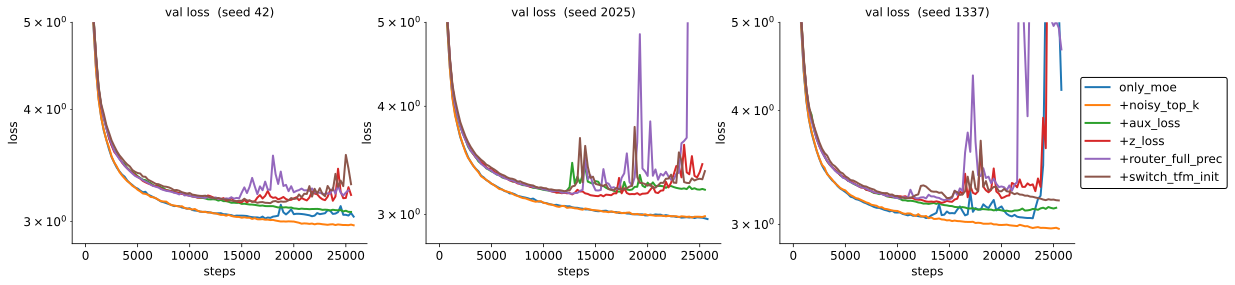

In [28]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6*3, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

for i, name in enumerate(MoE_NAMES):
    plot_one_stream(name, key='val', seeds=[42], ylim_top=5, ax=axes[0], title=True, label_all=True, legend=False)
    
for i, name in enumerate(MoE_NAMES):
    plot_one_stream(name, key='val', seeds=[2025], ylim_top=5, ax=axes[1], title=True, label_all=True, legend=False)

for i, name in enumerate(MoE_NAMES):
    plot_one_stream(name, key='val', seeds=[1337], ylim_top=5, ax=axes[2], title=True, label_all=True, legend=True)


# plt.savefig('figures/val_all_seeds.png', format="png", bbox_inches="tight")
plt.show()

In [13]:
# # create figure
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

# for name in MoE_NAMES:
#     plot_one_stream(name, key='val', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True)
    
# for name in MoE_NAMES:
#     plot_one_stream(name, key='val', seeds=[1337], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=False)

# plt.show()

### 2. HellaSwag accuracy

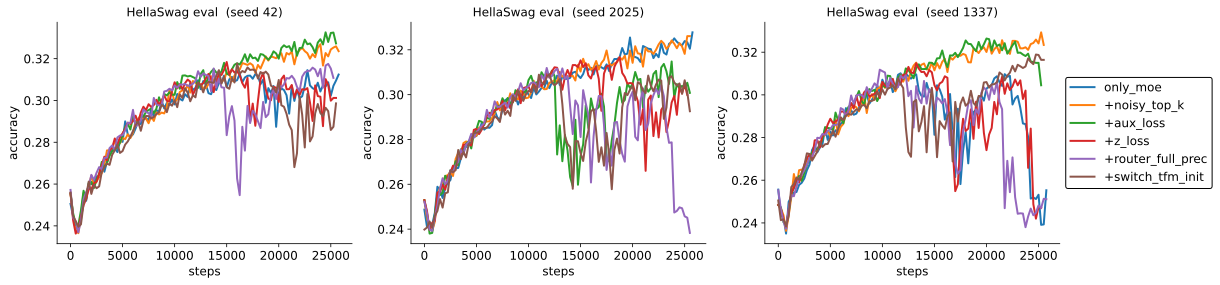

In [14]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6*3, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

for name in MoE_NAMES:
    plot_one_stream(name, key='hella', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)

for name in MoE_NAMES:
    plot_one_stream(name, key='hella', seeds=[2025], ax=axes[1], title=True, legend=False)

for name in MoE_NAMES:
    plot_one_stream(name, key='hella', seeds=[1337], ax=axes[2], title=True, legend=True)

plt.savefig('figures/hella_all_seeds.png', format="png", bbox_inches="tight")
plt.show()

In [29]:
# # create figure
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

# for name in MoE_NAMES:
#     plot_one_stream(name, key='hella', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True)

# for name in MoE_NAMES:
#     plot_one_stream(name, key='hella', seeds=[1337], ax=axes[1], title=True, legend=False)

# plt.show()

### 3. MoE vs. No MoE models
- note that MoE models do have more parameters than non-MoE models
- also vary number of experts: 1 of 8 vs. 2 of 8

In [30]:
EXPERT_NAMES = list(EXPERT_VARIATIONS.keys())
EXPERT_NAMES

['no_moe',
 'only_moe',
 'noisy_top_k',
 'only_moe_topk_1',
 'only_moe_topk_1_noisy_top_k']

In [31]:
# print(get_log_by_config(name=EXPERT_NAMES[4], seed=42))
# metrics = process_one_log_file(f"../logs/{get_log_by_config(name=EXPERT_NAMES[4], seed=42)}")
# metrics.keys()

In [47]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [41]:
colors_b

[(0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633)]

In [42]:
colors_g

[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

In [43]:
colors_r

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

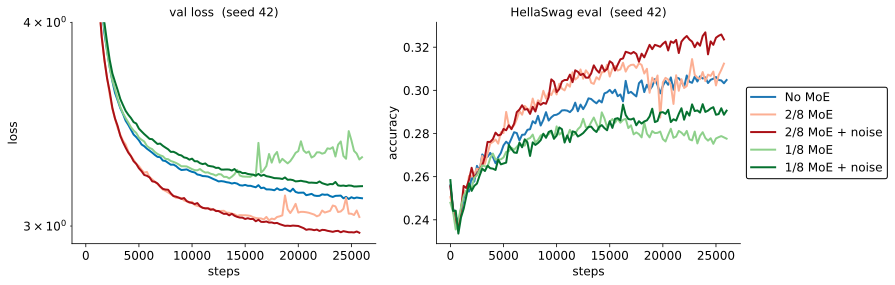

In [ ]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

# ----- val panel -----
plot_one_stream('no_moe', key='val', color=colors[0], label='No MoE', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)
plot_one_stream('only_moe', key='val', color=colors_r[1], label='2/8 MoE', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)
plot_one_stream('noisy_top_k', key='val', color=colors_r[-1], label='2/8 MoE + noise', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)

plot_one_stream('only_moe_topk_1', key='val', color=colors_g[2], label='1/8 MoE', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)
plot_one_stream('only_moe_topk_1_noisy_top_k', key='val', color=colors_g[-1], label='1/8 MoE + noise', seeds=[42], ylim_top=4, ax=axes[0], title=True, label_all=True, legend=False)



# ----- hella panel -----
plot_one_stream('no_moe', key='hella', label='No MoE', seeds=[42], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=False)
plot_one_stream('only_moe', key='hella', color=colors_r[1], label='2/8 MoE', seeds=[42], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=False)
plot_one_stream('noisy_top_k', key='hella', color=colors_r[-1], label='2/8 MoE + noise', seeds=[42], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=False)

plot_one_stream('only_moe_topk_1', key='hella', color=colors_g[2], label='1/8 MoE', seeds=[42], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=False)
plot_one_stream('only_moe_topk_1_noisy_top_k', key='hella', color=colors_g[-1], label='1/8 MoE + noise', seeds=[42], ylim_top=4, ax=axes[1], title=True, label_all=True, legend=True)

plt.show()

## scratch

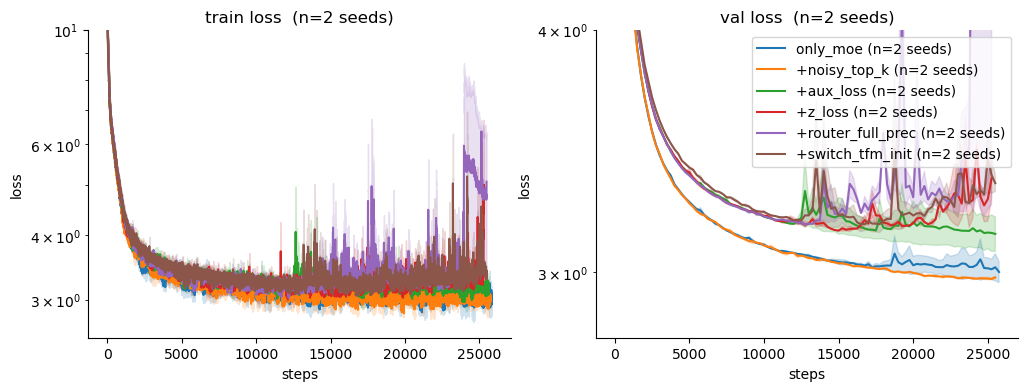

In [15]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})


for name in MoE_NAMES:
    plot_one_stream(name, key='train', ylim_top=10, ax=axes[0], title=True, label_all=True, legend=False)

for name in MoE_NAMES:
    plot_one_stream(name, key='val', ylim_top=4, ax=axes[1], title=True, label_all=True)

plt.show()

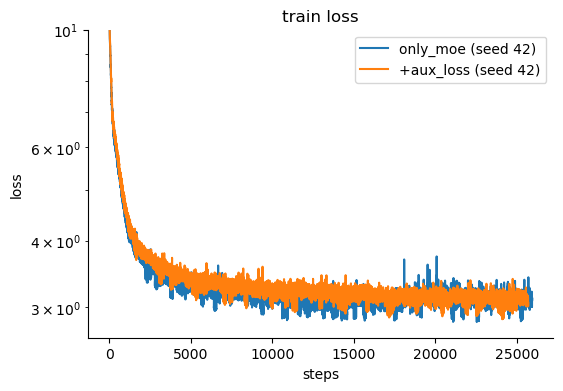

In [19]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6*1, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

plot_one_stream('only_moe', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('noisy_top_k', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
plot_one_stream('aux_loss', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('z_loss', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('router_full_prec', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('switch_tfm_init', key='train', ylim_top=10, ax=axes, title=True, label_all=True)

plt.show()

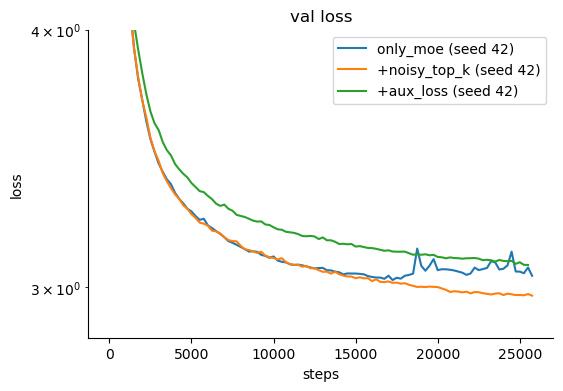

In [21]:
# create figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6*1, 4*1), gridspec_kw={'wspace':0.2,'hspace':0.5})

plot_one_stream('only_moe', key='val', ylim_top=4, ax=axes, title=True, label_all=True)
plot_one_stream('noisy_top_k', key='val', ylim_top=4, ax=axes, title=True, label_all=True)
plot_one_stream('aux_loss', key='val', ylim_top=4, ax=axes, title=True, label_all=True)
# plot_one_stream('z_loss', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('router_full_prec', key='train', ylim_top=10, ax=axes, title=True, label_all=True)
# plot_one_stream('switch_tfm_init', key='train', ylim_top=10, ax=axes, title=True, label_all=True)

plt.show()

## scratch

In [19]:
metrics = process_one_log_file(f"../logs/{get_log_by_config(name='aux_loss')}")
metrics.keys()

dict_keys(['val', 'hella', 'train'])

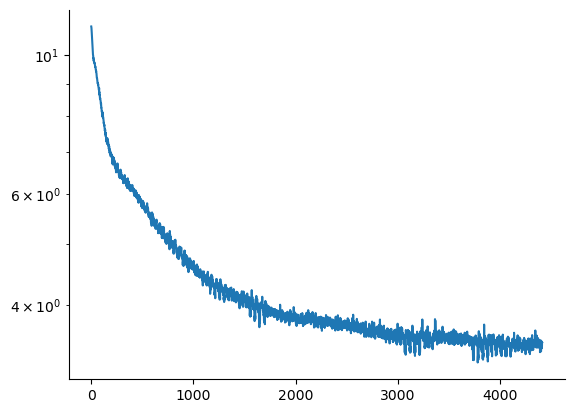

In [20]:
plt.plot(metrics['train'][0], metrics['train'][1])
plt.yscale('log')
plt.show()

In [69]:
losses = metrics['train'][1]
# I see some spikes in the loss, which is not good, can you find out the indices of the spikes?
# the spikes are always bigger than 10
spike_indices = [i for i, loss in enumerate(losses) if loss > 10]
spike_indices




[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 250,
 500,
 750,
 1000,
 1250,
 1500,
 1750,
 2000,
 2250]

In [71]:
losses[250]

47.889408